### Time Series analysis for identification of the impact of heat waves on urban heat island index (UHII)

In order to analyse the impact of heat waves on urban heat island index (UHII) the daily maximum air temperature collected from two different locations within the melbourne region was used. 

The Cilmatic data used for the analysis was obtained from the Bureau of Meteorology (BOM) website http://www.bom.gov.au/climate/data/index.shtml

The Daily maximum air temperature is nominally recorded at 9 am local time. It is the highest temperature for the 24 hours leading up to the observation, and is recorded as the maximum temperature for the previous day. 

The identified stations considered for the UHII calculation are as follows: 

1. MELBOURNE AIRPORT weather station

Latitude (decimal degrees, south negative): -37.67

Longitude (decimal degrees, east positive): 144.83

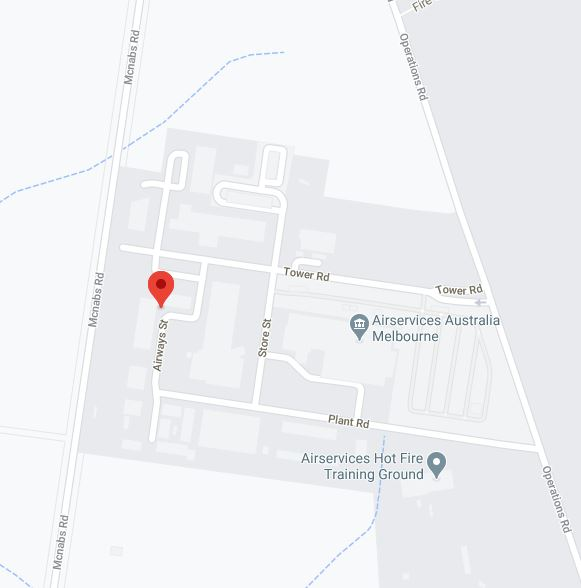

In [1]:
from IPython.display import Image
Image(filename='Mel_airport_ws.JPG')

2. MELBOURNE REGIONAL OFFICE weather station 

Latitude (decimal degrees, south negative): -37.81

Longitude (decimal degrees, east positive): 144.97

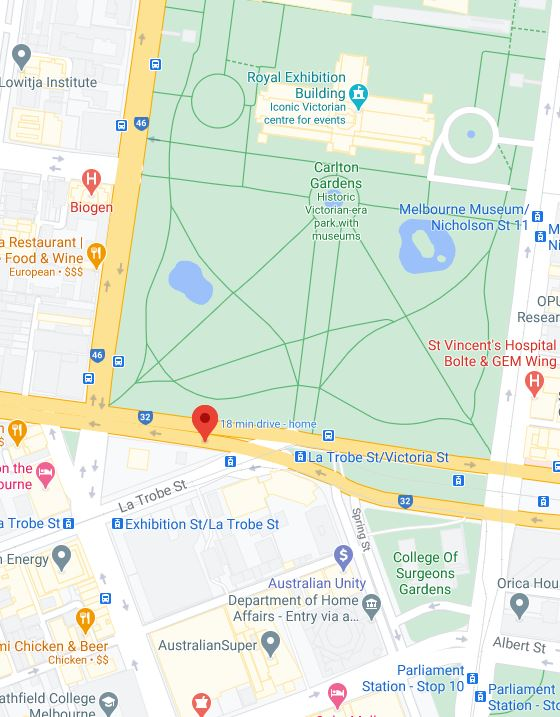

In [2]:
from IPython.display import Image
Image(filename='Mel_reg_office_ws.JPG')

In [4]:
# # -*- coding: utf-8 -*-
# """
# Created on Sat Sep 19 11:59:33 2020

# @author: Gokul
# """

# # import headers
# import pandas as pd
# from pathlib import *
# #for ploting
# #interactive dropdown
# import ipywidgets as widgets
# from ipywidgets import Layout, Button, Box, VBox, HBox, Output, ToggleButtons, HTML
# from IPython.display import display
# from bqplot.interacts import (
#     FastIntervalSelector, IndexSelector, BrushIntervalSelector,
#     BrushSelector, MultiSelector, LassoSelector, PanZoom, HandDraw
# )
# from traitlets import link
# import seaborn as sns
# from datetime import datetime as py_dtime
# import numpy as np
# import bqplot.pyplot as plt
# from bqplot import DateScale, LinearScale, Axis, Lines, Scatter, Bars, Hist, Figure

# # import matplotlib.pyplot as plt
# # Use seaborn style defaults and set the default figure size
# sns.set(rc={'figure.figsize':(20, 4)})

# # create the folder path 

# # Have to update the file path based on the PC you are running the code
# # folder_name = "\OneDrive - Swinburne University\Gokul\PhD\Research\Time_series_analysis_VU\Data\\"
# airport_file_name = "MELBOURNE AIRPORT_Data.csv"
# # airport_file_path=str(Path.home()) + str(folder_name) + str(airport_file_name)
# # printing the File path to make sure it is right
# # print(file_path)
# # Read csv file
# airport_data = pd.read_csv(airport_file_name)
# # display(Rural_data)
# #filter the data from 1990 to 2020
# airport_data=airport_data[airport_data.Year>1990]
# airport_data=airport_data[airport_data.Year<2015]
# # display(Rural_data)
# # # iterating the columns 
# # for col in Rural_data.columns: 
# #     print(col)

# # Rename the collumn header for ease of use
# # data=read_file.rename(columns={" Year Month Day Hour Minutes in YYYY": "year",
# #                                   "MM": "month",
# #                                   "DD": "day",
# #                                   "HH24":"hour",
# #                                   "MI format in Local standard time": "minute",
# #                                   "Air Temperature in degrees Celsius": "temp",                               
# #                                  })
# airport_Temp_data=airport_data.rename(columns={"Maximum temperature (Degree C)": "Airport_temp",                               
#                                  })
# #creating the date as a datetime

# airport_Temp_data['Date'] = pd.to_datetime(airport_Temp_data[['Year','Month','Day']])
# #collumns to filter
# collist=['Date','Airport_temp']
# airport_Temp_data = airport_Temp_data[collist]
# #set datetime as index
# airport_Temp_data = airport_Temp_data.set_index('Date')
# airport_Temp_data['Airport_temp'] = pd.to_numeric(airport_Temp_data['Airport_temp'], downcast="float",errors='coerce')
# # display(airport_Temp_data)
# #plot the data
# # airport_plot = airport_Temp_data.plot(title="Airport Temp Plot");
# # airport_plot.set_ylabel('Temp (degC)');
# # airport_plot.set_xlabel('Date');
# #interactive plot
# xs_pz = DateScale(min=np.datetime64(py_dtime(1991, 1, 1)))
# ys_pz = LinearScale()
# line_pz_1 = Lines(x=airport_Temp_data.index.values, y=airport_Temp_data, scales={'x': xs_pz, 'y': ys_pz}, colors=['blue'])

# panzoom = PanZoom(scales={'x': [xs_pz]})
# xax = Axis(scale=xs_pz, label='Date', grids='off')
# yax = Axis(scale=ys_pz, label='Temp (degC)', orientation='vertical', grid_lines='none')

# Figure(marks=[line_pz_1], axes=[xax, yax], interaction=panzoom, title='Melbourne Airport Air Temp')

Figure(axes=[Axis(label='Date', scale=DateScale(min=datetime.datetime(1991, 1, 1, 0, 0))), Axis(grid_lines='no…

In [5]:
# reg_off_file_name = "MELBOURNE REGIONAL OFFICE_Data.csv"
# # reg_off_file_path=str(Path.home()) + str(folder_name) + str(reg_off_file_name)
# # printing the File path to make sure it is right
# # print(file_path)
# # Read csv file
# reg_off_data = pd.read_csv(reg_off_file_name)
# # display(urban_1_data)
# #filter the data from 1990 to 2020
# reg_off_data=reg_off_data[reg_off_data.Year>1990]
# # this data set has only values recorded 
# reg_off_data=reg_off_data[reg_off_data.Year<2015]
# # display(urban_1_data)
# # # iterating the columns 
# # for col in Rural_data.columns: 
# #     print(col)

# # Rename the collumn header for ease of use
# # data=read_file.rename(columns={" Year Month Day Hour Minutes in YYYY": "year",
# #                                   "MM": "month",
# #                                   "DD": "day",
# #                                   "HH24":"hour",
# #                                   "MI format in Local standard time": "minute",
# #                                   "Air Temperature in degrees Celsius": "temp",                               
# #                                  })
# reg_off_Temp_data=reg_off_data.rename(columns={"Maximum temperature (Degree C)": "Reg_office_temp",                               
#                                  })
# #creating the date as a datetime

# reg_off_Temp_data['Date'] = pd.to_datetime(reg_off_Temp_data[['Year','Month','Day']])
# #collumns to filter
# collist=['Date','Reg_office_temp']
# reg_off_Temp_data = reg_off_Temp_data[collist]
# #set datetime as index
# reg_off_Temp_data = reg_off_Temp_data.set_index('Date')
# reg_off_Temp_data['Reg_office_temp'] = pd.to_numeric(reg_off_Temp_data['Reg_office_temp'], downcast="float",errors='coerce')
# # display(reg_off_Temp_data)
# #plot the data
# # reg_off_plot = reg_off_Temp_data.plot(title="Reg_office Temp Plot");
# # reg_off_plot.set_ylabel('Temp (degC)');
# # reg_off_plot.set_xlabel('Date');
# #interactive plot
# xs_pz = DateScale(min=np.datetime64(py_dtime(1991, 1, 1)))
# ys_pz = LinearScale()
# line_pz_2 = Lines(x=reg_off_Temp_data.index.values, y=reg_off_Temp_data, scales={'x': xs_pz, 'y': ys_pz}, colors=['blue'])

# panzoom = PanZoom(scales={'x': [xs_pz]})
# xax = Axis(scale=xs_pz, label='Date', grids='off')
# yax = Axis(scale=ys_pz, label='Temp (degC)', orientation='vertical', grid_lines='none')

# Figure(marks=[line_pz_2], axes=[xax, yax], interaction=panzoom, title='Melbourne Regional Office Temp')

Figure(axes=[Axis(label='Date', scale=DateScale(min=datetime.datetime(1991, 1, 1, 0, 0))), Axis(grid_lines='no…

### UHII Calculation

Airport_temp_data - Regional_office_temp_data

In [6]:
# UHI = airport_Temp_data['Airport_temp'] -reg_off_Temp_data['Reg_office_temp']

In [7]:
# xs_pz = DateScale(min=np.datetime64(py_dtime(1991, 1, 1)))
# ys_pz = LinearScale()
# line_pz = Lines(x=UHI.index.values, y=UHI, scales={'x': xs_pz, 'y': ys_pz}, colors=['green'])

# panzoom = PanZoom(scales={'x': [xs_pz]})
# xax = Axis(scale=xs_pz, label='Date', grids='off')
# yax = Axis(scale=ys_pz, label='Temp (degC)', orientation='vertical', grid_lines='none')

# Figure(marks=[line_pz], axes=[xax, yax], interaction=panzoom, title='UHII')

Figure(axes=[Axis(label='Date', scale=DateScale(min=datetime.datetime(1991, 1, 1, 0, 0))), Axis(grid_lines='no…

In [8]:
# print('THe Maximum recorded UHI from 1990 to 2019')
# UHI.max()

Maximum UHI


8.400002

In [9]:
# print('The Minimum recorded UHI from 1990 to 2019')
# UHI.min()

Minimum UHI


-4.3

In [10]:
# from pandas import DataFrame
# UHI_data = DataFrame (UHI,columns=['Temp'])
# UHI_data

In [17]:

# # y1, y2 = np.random.randn(2, 200).cumsum(axis=1) # two simple random walks

# fig_layout = Layout()
# # 1. Create the figure object
# time_series_fig = plt.figure(layout=fig_layout,title='Comparision Plot')
# # a dict and pass it to `axxes_options` argument in the marks
# axes_opts = {'x': {'label': 'Date'}, 
#              'y': {'label': 'Temp (degC)'}}
# dates= reg_off_Temp_data.index.values
# line = plt.plot(dates,[reg_off_Temp_data,airport_Temp_data, UHI_data], labels=['Regional_office_temp', 'Airport_office_temp', 'UHI_temp'], axes_options=axes_opts,  display_legend=True)


# # create a fast interval selector by passing in the X scale and the line mark on which the selector operates
# intsel = BrushIntervalSelector(marks=[line], scale=line.scales['x'])
# time_series_fig.interaction = intsel # set the interval selector on the figure

# scat_fig = plt.figure(layout=fig_layout, 
#                       animation_duration=750,
#                       title='Selected Region',
#                       height = 50)
# # set the x and y attributes to the y values of line.y
# scat = plt.plot(dates[len(reg_off_Temp_data)-1000:len(reg_off_Temp_data)],[
#     reg_off_Temp_data[len(reg_off_Temp_data)-1000:len(reg_off_Temp_data)],
#     airport_Temp_data[len(reg_off_Temp_data)-1000:len(reg_off_Temp_data)],
#     UHI_data[len(reg_off_Temp_data)-1000:len(reg_off_Temp_data)]],axes_options=axes_opts, labels=['Regional_office_temp', 'Airport_office_temp', 'UHI_temp'],display_legend=True)
# # display(len(scat.y[0]))
# # define a callback for the interval selector
# def update_scatter(*args):
#     brushing = intsel.brushing
    
#     # update scatter *only* when the interval selector
#     # is not brushing to prevent continuous updates
#     if not brushing:
#         # interval selector is active
#         if line.selected is not None:
#             # get the start and end indices of the interval
#             start_ix, end_ix = line.selected[0], line.selected[-1]
#         else:  # interval selector is *not* active
#             start_ix, end_ix = 0, -1
#         display(start_ix, end_ix)    
#         #update the x and y attributes of the scatter by slicing line.y
#         with scat.hold_sync():
#             display(len(line.y[0][start_ix:end_ix]))
# #             scat.y = line.y[start_ix:end_ix]
#             scat.x, scat.y = line.x[start_ix:end_ix],[line.y[0][start_ix:end_ix],line.y[1][start_ix:end_ix],line.y[2][start_ix:end_ix]]

# # register the callback with brushing trait of interval selector
# intsel.observe(update_scatter, 'brushing')
# # help_label = HTML('<div style="color: black; font-size: 20px; margin:20px 0px 0px 50px">\
# #                   Comparison of the Rural and Urban air temperature with the calculated UHI.</div>\
# #                   <div style="color: black; font-size: 20px; margin:20px 0px 0px 50px">To zoom into a particular area please click and drag then move the window to analyse the data</div>')
# VBox([time_series_fig, scat_fig])